#  **5주차 미션**

미션 목적 - 조건문, 반복문, 문자열, 리스트의 활용

 ✨  미션참가자: 토마토_리더, 이수빈, 하윤, eunv ✨

### 📌Q1. 여러분 혹시 베스킨라빈스31 게임을 아시나요? 1부터 31까지 숫자를 플레이어들끼리 번갈아 외치다가 31을 외치는 사람이 패배하는 게임인데요. 파이썬 함수를 활용해 다음의 규칙을 만족하는 게임을 만들어보고, 컴퓨터와 대결을 해보세요. [난이도 : ⭐️⭐️⭐️/5]

<게임 규칙>

1. 플레이어는 매 턴마다 숫자를 입력하며, 입력된 숫자들은 공백(space)로 구분합니다.
2. 플레이어와 컴퓨터 모두 한 번의 턴에서 최대 3개의 숫자를 외칠 수 있습니다.
3. 숫자를 외칠 때에는 이전에 외쳐진 숫자보다 1 큰 수만 외칠 수 있습니다.
   - 예를 들어, 컴퓨터가 마지막 숫자로 7을 외쳤다면, 플레이어는 7을 이어서 8, 9, 10 까지 외칠 수 있습니다.
   - 컴퓨터도 동일한 규칙을 따라야 합니다.
4. '31'이라는 숫자가 나오면 게임을 종료합니다.




✅⚡ 개선하려고 노력한 포인트

1.  main함수 사용으로 코드 캡슐화 및 재사용성 염두

2.  함수분리를 메인, 유저턴, 컴퓨터턴으로 기능을 알아보기 쉽게 분리. (게임모드 함수, 딜레이출력함수, 커서블링크함수 추가)

3. 입력부 개선(유저턴)
- 입력및 오류처리를 별도의 함수로 분리 -my_turn_input()
- 입력횟수를 제한하는 상수를 두고 함수내에서는 변수로 다시 받아서 활용
- 오류시 남은 입력회수 메세지 출력 (~회 남았습니다.)

4. 다양한 오류입력 가능성을 염두에 두고 대비
- 오류시 무한루프 방지 ☢ while True: ☢
- 입력오류대응 메시지출력 - 유저의 입력을 신뢰하지 않는다!  ex>문자입력, 무입력, 잘못된 시작의 숫자, 숫자의 수가 3개를 넘어가거나 없을때, 숫자가 1씩 증가하지 않을때, 컴퓨터 다음숫자에서 시작하지 않을때 등

5. ⚡(추가기능)  컴퓨터의 전략적 플레이 선택기능- 컴퓨터가 이기기위해 최선을 다해서 플레이

6. ⚡(추가기능) 게임이므로 에러메세지를 대화형 느낌이 나게 구성.
7. ⚡(추가기능) 컴퓨터가 적절한 딜레이를 가진속도로 숫자로 입력하며, 숫자가 쓰여지면서_(언더바)가 깜빡거려서 어느숫자에서 멈출지 유저가 알수 없게해, 약간의 긴장감 및 재미를주고, 컴퓨터가 고민하고있다는 느낌을 주려고 해봤음

In [1]:
import random
import time
MAIN_LOOP_LIMIT = 20 # 오류시 무한루프방지
MAX_INPUT_LIMIT = 5 # 입력오류시 최대 입력횟수

def main():
    my_input_list = []
    com_list = []
    my_last_number = 0
    com_last_number = 0
    reset = False

    print("★베스킨라빈스 31게임★\n")

    computer_turn = choose_computer_strategy() # 게임모드 선택

    main_loop_limit = MAIN_LOOP_LIMIT
    while main_loop_limit > 0 :
        my_input_list, reset = my_turn_input(com_last_number)

        if reset == True:
            print('입력오류가 많습니다. 게임을 다시 시작해주세요')
            break
        my_last_number = my_input_list[-1]

        if (my_last_number== 31):
            print("◑◐컴퓨터의 승리")
            break
        else:
            com_list = computer_turn(my_last_number)
            com_last_number = com_list[-1]


            print("\n▶컴퓨터 턴:",end='')
            blink_at_rate("_", 2, 0.2)
            for number in com_list:
                print_with_delay(str(number)+' ')
                blink_at_rate("_", 1, 0.2)
            blink_at_rate("_", 1, 0.2)
            if com_list[-1] == 31:
                print(f"♡유저의 승리♡")
                break
            print()
        main_loop_limit -= 1

def choose_computer_strategy():
    '''
    게임난이도 선택 디펄트로 랜덤플레이라 아무키나 누르면 됨. 전략플레이만 특정한 키로 선택
    '''
    strategy = input("컴퓨터가 지능적으로 플레이하게 할까요?(Press:'O'),일반플레이는 아무키나 누르세요: ")
    if strategy == "O" or strategy == "o" :
        print("◑◐컴퓨터:",end='')
        print_with_delay("봐드리지 않겠습니다. 휴먼")
        print()
        return computer_turn_strategic
    else:
        print("◑◐컴퓨터:",end='')
        print_with_delay("즐겁게 게임합시다. 휴먼")
        print()
        return computer_turn_random

def my_turn_input(com_last_number:int)->tuple:
    """
    사용자로부터 게임 입력을 받는 함수( 다양한 입력오류에 대응)

    Args:
        com_last_number (int): 컴퓨터가 마지막으로 낸 숫자

    Returns:
        tuple: (사용자가 입력한 숫자 리스트, 게임 리셋 여부)
    """


    reset = False # 오류입력시 프로그램 종료여부

    input_limit = MAX_INPUT_LIMIT
    print("\n▷유저턴")
    while input_limit > 0 :
        repeat = False # for문 내에서 외부의  while문의 진행여부를 표기위한 parity bit
        try:
            num_str  = input("숫자들을 입력하세요. (공백으로 구분): ")
            my_input_list= [int(num) for num in num_str.split()]

            if len(my_input_list) > 3 or len(my_input_list)==0: # 입력숫자가 4개 이상이거나 없을때
                input_limit -=1
                print(f"◑◐컴퓨터:3개이하의 숫자를 입력하세요. 바른입력전까지 {input_limit}회의 입력횟수가 남았습니다.")
                continue

            if(com_last_number+1 != my_input_list[0]): # 컴퓨터 입력의 다음수부터 인지 체크
                input_limit -=1
                print(f"◑◐컴퓨터:{com_last_number+1}부터 시작해주세요. 바른 입력전까지{input_limit}회의 입력횟수가 남았습니다")
                continue

            for i in range(len(my_input_list)-1):  # 숫자가 1씩 증가하도록 입력했는지 체크
                if my_input_list[i+1]-my_input_list[i] !=1:
                    input_limit -=1
                    print(f"◑◐컴퓨터:1씩 증가하는 번호를 넣어주세요. 바른 입력전까지{input_limit}회의 입력횟수가 남았습니다")
                    repeat = True
                    break

            if repeat == True: continue

            return my_input_list, reset

        except ValueError:  # 문자나 입력을 안했을때를 체크
            input_limit -=1
            print(f"◑◐컴퓨터:숫자를 공백을 넣어서 입력해주세요.바른 입력전까지{input_limit}회의 입력횟수가 남았습니다.")


    reset = True
    return my_input_list,reset

def computer_turn_random(last_number:int)->list:
    """
    컴퓨터의 랜덤한 플레이

    Args:
        last_number (int): 상대방이 마지막으로 낸 숫자

    Returns:
        list: 컴퓨터가 낸 숫자 리스트
    """

    com_input_list = []
    com_last_number = last_number

    for i in range(random.randint(1,3)):
        com_last_number += 1
        com_input_list.append(com_last_number)
        if com_last_number == 31:
            break

    return com_input_list
def computer_turn_strategic(my_last_number:int)->list:
    '''
    이기기 위해 최선을 다하는 컴퓨터
    '''

    com_input_list = []

    if (my_last_number+1) %4 == 2:
        com_input_list.append(my_last_number+1)
        return com_input_list
    elif (my_last_number+2) %4 == 2:
        return [my_last_number+1,my_last_number+2]
    elif (my_last_number+3) %4 == 2:
        return [my_last_number+1,my_last_number+2,my_last_number+3]
    else:
        for i in range(random.randint(1,3)):
            my_last_number += 1
            com_input_list.append(my_last_number)
            if my_last_number == 31:
                break

    return com_input_list

def print_with_delay(text):
    '''
    메세지출력을 천천히한다.
    '''
    delay = 0.1

    for char in text:
        print(char, end='', flush = True)
        time.sleep(delay)

def blink_at_rate(symbol, times, interval):
    '''
    게임하는 느낌을 주기위해 커서가 잠시깜빡이며 고민하는 듯한 연출을 한다.
    '''
    for _ in range(times):
        print(symbol, end='', flush=True)
        time.sleep(interval)
        print("\b" * len(symbol), end='', flush=True)
        time.sleep(interval)

if __name__ == '__main__':
    main()

★베스킨라빈스 31게임★
◑◐컴퓨터:즐겁게 게임합시다. 휴먼

▷유저턴

▶컴퓨터 턴:3 4 

▷유저턴

▶컴퓨터 턴:6 

▷유저턴
◑◐컴퓨터:3개이하의 숫자를 입력하세요. 바른입력전까지 4회의 입력횟수가 남았습니다.
◑◐컴퓨터:3개이하의 숫자를 입력하세요. 바른입력전까지 3회의 입력횟수가 남았습니다.
◑◐컴퓨터:3개이하의 숫자를 입력하세요. 바른입력전까지 2회의 입력횟수가 남았습니다.
◑◐컴퓨터:3개이하의 숫자를 입력하세요. 바른입력전까지 1회의 입력횟수가 남았습니다.
◑◐컴퓨터:3개이하의 숫자를 입력하세요. 바른입력전까지 0회의 입력횟수가 남았습니다.
입력오류가 많습니다. 게임을 다시 시작해주세요


### 📌Q2. 한 중학교에서는 중간고사가 끝난 후, 학생들의 시험 답지와 정답지를 비교하여 점수를 계산하는 채점 프로그램을 도입하려고 합니다. 학생들의 시험 답지와 정답지가 다음과 같이 주어졌을 때, 파이썬 함수를 활용하여 다음의 요구사항을 충족하는 채점 프로그램을 만들어보세요. [난이도 : ⭐️⭐️⭐️⭐️/5]

<요구사항>

1. 학생들의 답안을 채점해주세요.
2. 모든 학생들의 점수를 계산하고 등수를 매겨주세요.
3. 최종적으로 학생들의 점수와 등수를 출력하세요.

✅⚡
중점 포인트
1. 기능을 분석해보면 학생데이타를 항목추가가 편리한  dict형으로 변환, 채점, 출력 정도가 타당해보임 따라서 데이타변환과 채점은 따로 함수로 분리함
2. 상수데이타는 함수밖으로 빼고 대문자처리, 외부변경 용이함을 추구
3. 리스트 상수의 경우 mutable 이므로 상수를 건들지 않기위해 .copy()명령어로 사본을 사용
4. ⚡(추가기능) 성적순 정렬외에 이름순 정렬기능 추가


❓ 궁금한 점: 근래 자바스크립트나 플러터의 다트를 공부하다보니 다른 언어에서는 const등으로 값의 변경을 금지하는 기능이 발달되어있지만, 파이썬에서는 그러한 점이 강력하지 않은듯 싶습니다. 어째서 그러한 걸 지원하지 않는 것일까요? 그래서 값의 변경이 가능한 경우 copy()를 활용해 사본으로 사용하는것을 해봤는데 이것이 좋은방법일지 모르겠네요. 메모리에 똑같은 배열을 다시 점유한다면 메모리 낭비일수있겠지만, 원본을 손상시킬 가능성을 없애기위해서 이렇게 해봤습니다.

In [1]:
#Q2
STUDENT_MARKING = ["김갑,3242524215",
                "이을,3242524223",
                "박병,2242554131",
                "최정,4245242315",
                "정무,3242524315"]
ANSWER = [3,2,4,2,5,2,4,3,1,2]
INPUT_LIMIT = 5

def count_score(student_answer:list, real_answer:list)->int:
    """
  학생의 답안과 정답 리스트를 비교하여 공통된 부분을 채점하는 함수
  """
    score = 0
    for i in range(len(student_answer)):
        if student_answer[i] == real_answer[i]:
            score = score + 10
    return score

def to_dictionary_of_studnet(student_marking:list)->list:
    """
   학생 정보 리스트를 다양한 항목을 추가할 수 있는 딕션어리형식의 리스트로 확장
   """
    return [{'name': student[0:2], 'mark': list(map(int, (' '.join(student[3:])).split()))} for student in student_marking]

def main():
    student_marking_copy = STUDENT_MARKING.copy() # mutable  사본을 만들어 사용
    answer_copy = ANSWER.copy()

    test_result = to_dictionary_of_studnet(student_marking_copy) # 학생마다 딕션어리로 변환

    for student in test_result:
        student['score'] = count_score(student['mark'],answer_copy) # 두 리스트를 비교해서 학생마다 점수저장

    test_result.sort(key= lambda x: x['score'],reverse=True) # 점수의 내림차순으로 정리
    for index, student in enumerate(test_result):
      student['rank'] = index+1

    input_limit = INPUT_LIMIT

    while(input_limit>0):
        select_sorting = input("성적순서대로 보시겠습니까?(1) 이름순서로 보시겠습니까?(2)")
        if select_sorting == '1':
            print("\n>> 성적 순위표 <<\n")
            for index, student in enumerate(test_result):
                print(f"학생: {student['name']}  성적:{student['score']}  등수:{student['rank']} ") # 점수순서로 출력
            break
        elif select_sorting == '2':
            test_result.sort(key= lambda x: x['name'])
            print("\n>> 학생목록 <<\n")
            for index, student in enumerate(test_result):
                print(f"학생: {student['name']}  성적:{student['score']}  등수:{student['rank']} ")
            break
        elif input_limit == 1:
            print('종료합니다.')
            break
        else:
            input_limit -= 1
            print(f' 1 아니면 2로 입력해주십시오. 입력이 잘못되면 {input_limit}번후 종료합니다.')


if __name__ == '__main__':
    main()

 1 아니면 2로 입력해주십시오. 입력이 잘못되면 4번후 종료합니다.
 1 아니면 2로 입력해주십시오. 입력이 잘못되면 3번후 종료합니다.
 1 아니면 2로 입력해주십시오. 입력이 잘못되면 2번후 종료합니다.
 1 아니면 2로 입력해주십시오. 입력이 잘못되면 1번후 종료합니다.
종료합니다.


### 📌Q3. 여러분은 오랜 친구와 함께 휴가를 보내기로 결정했습니다. 그리고 그 휴가의 첫 날, 두 사람은 재미있는 게임을 하기로 했습니다. 이 게임은 Up&Down 으로 숫자를 맞추는 것인데요, 컴퓨터가 1개의 숫자를 랜덤하게 생성하면, 우리가 그 값을 맞추는 도전을 해보려 합니다. 파이썬 함수를 활용해 다음의 규칙을 만족하는 Up&Down 게임을 만들어보세요. [난이도 : ⭐️⭐️⭐️⭐️/5]



<게임 규칙>

1. 게임에서 사용되는 숫자는 숫자는 0부터 100까지의 정수로 한정합니다.
2. 사용자가 입력한 숫자와 컴퓨터가 선택한 숫자를 비교하여,
정답을 맞추지 못한다면 다음과 같은 힌트를 제공합니다.
   - 만약 사용자의 숫자가 정답보다 크다면, "Down!" 이라는 메세지를 출력합니다.
   - 만약 사용자의 숫자가 정답보다 작다면, "Up!"이라는 메세지를 출력합니다.
3. 이전 시도에 입력한 숫자는 "이미 예측에 사용한 숫자입니다."라는 메세지를 출력합니다.
    - 만약 앞선 시도에서 작성한 숫자보다 크거나 작은 경우, 올바른 범위로 예측할 수 있게 가이드합니다.
4. 게임이 종료되면, 정답과 함께 사용자가 정답을 맞추기까지 시도한 횟수를 출력합니다.

✅⚡ 중점포인트<br>
0. Q1에서 쓰이는 개선사항을 반영하려고했음
1.  게임진행부, 입력기능, 근거리값구하기 세가지 함수로 나눔
2. 무한루프를 방지하기위한 상수를 설정하고 함수내에서는 변수로 받아옴
3. 근거리값이 없는 초기상황을 파악하기위해 None을 대입해서 구분함.
4. if문안에 if문이 들어가지 않게 가독성을 높임(이부분은 chatGPT 활용해서 코드개선을 했음)
5. 업다운등 특수문자 활용으로 인터페이스 개선.
6. ⚡(추가기능) 유저의 과거 입력에 근거해,입력 메세지 부분에서 ()를 통해 범주를 업데이트해서 알려주는 기능 추가

In [ ]:
import random
MAIN_LOOP_LIMIT = 30
INPUT_LIMIT = 5

def play_game():
    randomed_number = random.randint(1, 99)
    user_numbers = []
    count = 1
    closest_big, closest_small = None,None # 초기에는 근거리값이 없다는 사실을 확인할 필요가있음.
    main_loop_limit =MAIN_LOOP_LIMIT

    print("◑◐컴퓨터:",end='')
    print("제가 상상한 번호를 맞춰보십시오. 휴먼")

    while main_loop_limit>0: # 에러발생시 무한루프 방지

        user_numbers = get_user_input(count,closest_big,closest_small,user_numbers) # 유저에게 입력을 받음
        closest_big, closest_small = get_closest_number(user_numbers, randomed_number) # 조언을 위한 근거리값을 구함

        if user_numbers[-1] > randomed_number and (closest_big is None or user_numbers[-1] <= closest_big):
            print("▽Down! 다시 고민해보세요.")
        elif user_numbers[-1] < randomed_number and (closest_small is None or user_numbers[-1] >= closest_small):
            print("△Up! 다시 고민해보세요.")
        elif user_numbers[-1] > randomed_number and closest_big is not None and user_numbers[-1] > closest_big:
            print(f"◑◐컴퓨터:휴먼, 앞선 예측보다 큰 숫자입니다. 더 작은 수를 입력해주십시오. \n지금까지 시도중 가까운 최대값은 {closest_big}입니다.")
        elif user_numbers[-1] < randomed_number and closest_small is not None and user_numbers[-1] < closest_small:
            print(f"◑◐컴퓨터:휴먼, 앞선 예측보다 작은 숫자입니다. 더 큰 수를 입력해주십시오. \n지금까지 시도중 가까운 최소값은 {closest_small}입니다.")
        else:
            print(f'◑◐컴퓨터:휴먼, 정답입니다. {count}차 시도만에 예측에 성공했네요.♡ 게임을 종료합니다.~♬')
            break
        count +=1
        main_loop_limit -= 1


def get_user_input(count,closest_big,closest_small,user_numbers):
    input_limit = INPUT_LIMIT
    start = closest_small if closest_small else 0
    end = closest_big if closest_big else 100

    while input_limit>0: # 입력오류시 무한루프 방지
        try:
            user_input = int(input(f'\n◇{count}차 시도◇ \n숫자를 예측해보세요.({start}~{end})사이: ')) # 입력부에서 범주를 업데이트해 알려줌
            if user_input in user_numbers:
                print("◑◐컴퓨터:휴먼, 이미 예측에 사용한 숫자입니다.")
                count +=1
                continue
            break
        except ValueError:
            input_limit -= 1
            print(f"◑◐컴퓨터:휴먼, 숫자를 입력해주세요. 바른 입력까지 {input_limit}회 남았습니다.")
    user_numbers.append(user_input)
    return user_numbers

def get_closest_number(user_numbers, randomed_number):
    user_numbers_differnt = [i - randomed_number for i in user_numbers]
    bigger_numbers = [(i, num) for i, num in enumerate(user_numbers_differnt) if num > 0]
    smaller_numbers =[(i, num) for i, num in enumerate(user_numbers_differnt) if num < 0]

    closest_big = None # 조언을 주는 근거리값의 None으로 설정해 초기에 입력값이 없을때를 구분한다
    closest_small = None

    if len(bigger_numbers) != 0:
        bigger = min(bigger_numbers, key=lambda x: x[1])
        closest_big = user_numbers[bigger[0]]

    if len(smaller_numbers) != 0:
        smaller = max(smaller_numbers, key=lambda x: x[1])
        closest_small = user_numbers[smaller[0]]

    return closest_big, closest_small


if __name__ == '__main__':
    play_game()


◑◐컴퓨터:제가 상상한 번호를 맞춰보십시오. 휴먼

◇1차 시도◇ 
숫자를 예측해보세요.(0~100)사이: 50
▽Down! 다시 고민해보세요.

◇2차 시도◇ 
숫자를 예측해보세요.(0~50)사이: 10
△Up! 다시 고민해보세요.

◇3차 시도◇ 
숫자를 예측해보세요.(10~50)사이: 35
▽Down! 다시 고민해보세요.

◇4차 시도◇ 
숫자를 예측해보세요.(10~35)사이: 50
◑◐컴퓨터:휴먼, 이미 예측에 사용한 숫자입니다.

◇5차 시도◇ 
숫자를 예측해보세요.(10~35)사이: 55
◑◐컴퓨터:휴먼, 앞선 예측보다 큰 숫자입니다. 더 작은 수를 입력해주십시오. 
지금까지 시도중 가까운 최대값은 35입니다.

◇5차 시도◇ 
숫자를 예측해보세요.(10~35)사이: 7
◑◐컴퓨터:휴먼, 앞선 예측보다 작은 숫자입니다. 더 큰 수를 입력해주십시오. 
지금까지 시도중 가까운 최소값은 10입니다.

◇6차 시도◇ 
숫자를 예측해보세요.(10~35)사이: 20
△Up! 다시 고민해보세요.

◇7차 시도◇ 
숫자를 예측해보세요.(20~35)사이: 27
△Up! 다시 고민해보세요.

◇8차 시도◇ 
숫자를 예측해보세요.(27~35)사이: 30
▽Down! 다시 고민해보세요.

◇9차 시도◇ 
숫자를 예측해보세요.(27~30)사이: 28
△Up! 다시 고민해보세요.

◇10차 시도◇ 
숫자를 예측해보세요.(28~30)사이: 29
◑◐컴퓨터:휴먼, 정답입니다. 10차 시도만에 예측에 성공했네요.♡ 게임을 종료합니다.~♬


  🏀 기능예시<br>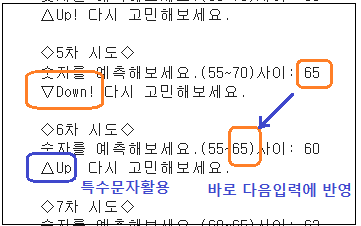

### 📌Q4. 얼마 전, 당신은 한 사람과 만나게 되었습니다. 서로의 마음을 알아가며 진실된 사랑이 시작되었고, 곧 100일이 다가오고 있습니다. 이 날을 기념하기 위해 당신은 특별한 이벤트를 준비하려고 하는데요, 하지만 100일 기념일이 정확히 언제인지 알지 못합니다. 그래서 파이썬 함수를 활용해 100일 뒤가 몇월 며칠인지 계산하는 프로그램을 작성하려고 합니다. 다음의 요구사항을 충족하는 D-Day 계산기 프로그램을 만들어보세요. [난이도 : ⭐️⭐️⭐️⭐️/5]



<요구사항>

1. 사용자로부터 날짜와 요일을 입력받습니다.
2. "오늘부터 1일"이기 때문에, 입력한 날짜를 하루로 포함하여 계산합니다.
3. 연도는 구분하지 않으며, 윤년을 고려하지 않고 2월은 항상 28일로 가정합니다.
4. 계산 결과는 "100일 뒤의 날짜는 X월 X일 X요일입니다." 라는 메세지와 함께 출력합니다.

✅ 중점포인트
1. date 모듈을 쓰지 않고 자체적인 로직으로 해결해봄
2. 100일이라는 기간이 3달 남짓의 기간이므로 시작하는 달과 끝나는 달 사이에  2-3달의 텀이 있을수있음 따라서, 사이에 2달이 있는경우와 3달이 있는 경우를 나눠봄
3. 다음해로 넘어가게 되는 경우 슬라이싱을 활용해 그만큼 앞에서 더함
4. 입력부 분리하고 다양한 입력오류 대응
- 월은 1~12 사이에만 있고 일은 해당월에 있는 일수만 사용가능 등으로 오류입력 경우를 최대한 대응.
5. 리스트상수의 경우 mutable이므로 .copy()로 사본을 만들어 사용
6. sys.exit()를 사용해봄

In [ ]:
#Q4
import sys

WEEK_DAYS = ["월", "화", "수", "목", "금", "토", "일"]
MONTH_DAYS =[31,28,31,30,31,30,31,31,30,31,30,31]
INPUT_LIMIT =6

def calculate_future_date(month:int ,day:int )-> tuple:
    '''
    달과 날을 입력받아 99일후를 계산하는 함수
    '''
     #월별 일의 개수
    month_days = MONTH_DAYS.copy()
    remained_days_count = 99 # 100일 기념일
    remained_days_count -=  (month_days[month-1] - day) #그달끝까지 지나간 날수

    if (month + 3) > 12: # 다음해로 넘어가면 그만큼 앞에서 더함
        days_of_3month = sum(month_days[month:]+month_days[:(month+3)%12])
        days_of_2month = sum(month_days[month:]+month_days[:(month+2)%12])
    else:
        days_of_3month = sum(month_days[month:month + 3])
        days_of_2month = sum(month_days[month:month + 2])

    if(remained_days_count - days_of_3month > 0): # 3달을 넘어가도 남는날짜가있는지
        future_month = (month+4)%12
        future_day = remained_days_count - days_of_3month
    else:
        future_month = (month+3)%12
        future_day = remained_days_count - days_of_2month

    return (future_month, future_day)

def what_weekday(weekday:str)-> str:
    '''
    99일후를 7로 나누면 1이 남기때문에 무조건 다음요일이 된다.
    일반화로 수정할 생각
    '''

    week_days = WEEK_DAYS.copy()

    if week_days[ week_days.index(weekday)] =='일':
        return '월'
    return week_days[ week_days.index(weekday)+1]

def input_date_week():
    month_days = MONTH_DAYS.copy() #mutable은 사본을 만듬
    week_days = WEEK_DAYS.copy()
    input_limit = INPUT_LIMIT # immutable
    reset = False
    month,day,weekday = None,None,None

    while input_limit > 0:
        try:
            input_date = input("오늘 날짜를 입력하세요(월,일,요일): ")
            month, day, weekday = input_date.split(',')
            if (int(month) not in range(1,13)) or (int(day) not in range(1, month_days[int(month)-1]+1)) or (weekday not in week_days):
                input_limit -=1
                print(f"날짜와 요일을 바르게 입력해주세요 남은 입력횟수는 {input_limit}입니다.")

                continue
            break
        except:
            input_limit -=1
            print(f"바르게 입력해주세요.남은 입력횟수는 {input_limit}입니다.")

            continue

    if input_limit == 0:
        reset = True
    return reset, month, day, weekday


def main():
    print("♡ 커플 100일 기념일 계산기 ♡")

    reset, month, day, weekday = input_date_week()
    if reset == True:
        sys.exit("입력오류로 종료합니다.")
    future_month, future_day = calculate_future_date(int(month), int(day))
    future_week = what_weekday(weekday)
    print(f'당신의 백일 기념일은 {future_month}월 {future_day}일,{future_week}요일 입니다 ♡')

if __name__ == '__main__':
    main()


♡ 커플 100일 기념일 계산기 ♡
오늘 날짜를 입력하세요(월,일,요일): 12,5,월
당신의 백일 기념일은 3월 14일,화요일 입니다 ♡


❗ 입력오류처리 예시<br>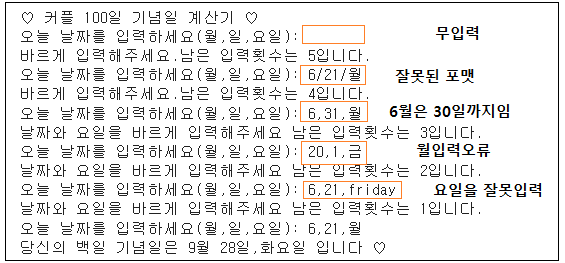

⛲ 작성후기 -<br>
과제의 기능을 충실히 구현하면서도, 상상력을 보태서 기능을 추가해 자유롭게 코딩을 하려고했습니다. 과제대로만 하니까 왠지 숙제를 하고있는 기분이라, 그보다는 주도적으로 뭔가를 더해보자는 생각에서 의욕이 더 생기는듯 합니다.🥰

게임형식의 미션이 많은데  기능을 구현하니 바로바로 숫자가 나와서 뭔가 상대방과 게임을 하는듯한 느낌을 받지못했습니다. 그래서 지능플레이에, 딜레이출력, 커서가 깜빡이는 연출도 넣어봤고, 숫자를 칠때마다 타자기 소리가 나는 연출도 넣고싶었지만, 코랩에서는 사운드파일 재생시 재생창이 뜨는걸 없애기 어려운듯해서 아쉬웠습니다.

상수에 대해서는 코치님의 조언을 듣고, 다른언어를 공부하면서 느낀점을 바탕으로 상수를 다루는 것에 대해서 고민을 해서 작성을 했지만, 이런 방법이 좋은지에 대해서는 조언을 구하고 공부를 더해봐야겠습니다.

그전에는 코드가 제대로 작동하는것에 주로 초점이 있었는데, 부스트코스를 하면서 가독성이나 코드의 견고함이나 안정성에 더 신경을쓰는쪽으로 인식이 발전하는 것 같습니다.

무엇보다 이번과제에 팀원들이 정말 어려워했는데도, 포기하지않고 성실히 제출해주신것에 대해서 감사하고 뿌듯한 심정입니다.

In [ ]:
import random
import time

class BaskinRobbins31:
    def __init__(self):
        self.MAX_INPUT_LIMIT = 5
        self.MAIN_LOOP_LIMIT = 20
        self.my_input_list = []
        self.com_list = []
        self.my_last_number = 0
        self.com_last_number = 0
        self.reset = False

    def main(self):
        print("★베스킨라빈스 31게임★\n")
        computer_turn = self.choose_computer_strategy()

        main_loop_limit = self.MAIN_LOOP_LIMIT
        while main_loop_limit > 0:
            self.my_input_list, self.reset = self.my_turn_input(self.com_last_number)

            if self.reset:
                print('입력오류가 많습니다. 게임을 다시 시작해주세요')
                break
            self.my_last_number = self.my_input_list[-1]

            if self.my_last_number == 31:
                print("◑◐컴퓨터의 승리")
                break
            else:
                self.com_list = computer_turn(self.my_last_number)
                self.com_last_number = self.com_list[-1]

                print("\n▶컴퓨터 턴:", end='')
                self.blink_at_rate("_", 2, 0.2)
                for number in self.com_list:
                    self.print_with_delay(str(number)+' ')
                    self.blink_at_rate("_", 1, 0.2)
                self.blink_at_rate("_", 1, 0.2)
                if self.com_list[-1] == 31:
                    print(f"♡유저의 승리♡")
                    break
                print()
            main_loop_limit -= 1

    def choose_computer_strategy(self):
        strategy = input("컴퓨터가 지능적으로 플레이하게 할까요?(Press:'O'), 일반플레이는 아무키나 누르세요: ")
        if strategy.lower() == "o":
            print("◑◐컴퓨터:", end='')
            self.print_with_delay("봐드리지 않겠습니다. 휴먼")
            print()
            return self.computer_turn_strategic
        else:
            print("◑◐컴퓨터:", end='')
            self.print_with_delay("즐겁게 게임합시다. 휴먼")
            print()
            return self.computer_turn_random

    def my_turn_input(self, com_last_number: int) -> tuple:
        reset = False
        input_limit = self.MAX_INPUT_LIMIT
        print("\n▷유저턴")
        while input_limit > 0:
            repeat = False
            try:
                num_str = input("숫자들을 입력하세요. (공백으로 구분): ")
                my_input_list = [int(num) for num in num_str.split()]

                if len(my_input_list) > 3 or len(my_input_list) == 0:
                    input_limit -= 1
                    print(f"◑◐컴퓨터: 3개이하의 숫자를 입력하세요. 바른입력전까지 {input_limit}회의 입력횟수가 남았습니다.")
                    continue

                if com_last_number + 1 != my_input_list[0]:
                    input_limit -= 1
                    print(f"◑◐컴퓨터: {com_last_number+1}부터 시작해주세요. 바른 입력전까지 {input_limit}회의 입력횟수가 남았습니다")
                    continue

                for i in range(len(my_input_list) - 1):
                    if my_input_list[i + 1] - my_input_list[i] != 1:
                        input_limit -= 1
                        print(f"◑◐컴퓨터: 1씩 증가하는 번호를 넣어주세요. 바른 입력전까지 {input_limit}회의 입력횟수가 남았습니다")
                        repeat = True
                        break

                if repeat:
                    continue

                return my_input_list, reset

            except ValueError:
                input_limit -= 1
                print(f"◑◐컴퓨터: 숫자를 공백을 넣어서 입력해주세요. 바른 입력전까지 {input_limit}회의 입력횟수가 남았습니다.")

        reset = True
        return my_input_list, reset

    def computer_turn_random(self, last_number: int) -> list:
        com_input_list = []
        com_last_number = last_number

        for _ in range(random.randint(1, 3)):
            com_last_number += 1
            com_input_list.append(com_last_number)
            if com_last_number == 31:
                break

        return com_input_list

    def computer_turn_strategic(self, my_last_number: int) -> list:
        com_input_list = []

        if (my_last_number + 1) % 4 == 2:
            com_input_list.append(my_last_number + 1)
            return com_input_list
        elif (my_last_number + 2) % 4 == 2:
            return [my_last_number + 1, my_last_number + 2]
        elif (my_last_number + 3) % 4 == 2:
            return [my_last_number + 1, my_last_number + 2, my_last_number + 3]
        else:
            for _ in range(random.randint(1, 3)):
                my_last_number += 1
                com_input_list.append(my_last_number)
                if my_last_number == 31:
                    break

        return com_input_list

    def print_with_delay(self, text):
        delay = 0.1

        for char in text:
            print(char, end='', flush=True)
            time.sleep(delay)

    def blink_at_rate(self, symbol, times, interval):
        for _ in range(times):
            print(symbol, end='', flush=True)
            time.sleep(interval)
            print("\b" * len(symbol), end='', flush=True)
            time.sleep(interval)

if __name__ == '__main__':
    game = BaskinRobbins31()
    game.main()